In [61]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

_checkpoint_folder = Path("../results/ppo_toy_fullembed_0")
_num_iters = 1000
_checkpoint_freq = 10
_train_res_fname = "train_res.json"

def create_save_folder(base, cur_iter):
    return base / f"iter_{cur_iter:05d}/"

all_data = []
for cur_iter in range(0, _num_iters + 1, _checkpoint_freq):
    save_folder = create_save_folder(_checkpoint_folder, cur_iter)
    with open(save_folder / _train_res_fname, "r") as f:
        obj = json.load(f)

    all_data += [{
        "train_iter": obj["training_iteration"],
        "timesteps_total": obj["timesteps_total"],
        "episodes_total": obj["episodes_total"],
        **obj["custom_metrics"],
        # **obj["timers"],
        "time_total_s": obj["time_total_s"],
    }]

df_res = pd.DataFrame(all_data)

In [62]:
df_res

,train_iter,timesteps_total,episodes_total,winrate,n_won_battles,n_finished_battles,time_total_s
0,1,1024,85,0.305882,26.0,85,7.504566
1,11,11264,1030,0.329000,329.0,1000,76.919317
2,21,21504,1964,0.386000,386.0,1000,143.544363
3,31,31744,2903,0.452000,452.0,1000,209.257409
4,41,41984,3875,0.522000,522.0,1000,275.662787
...,...,...,...,...,...,...,...
96,961,992256,112026,0.892000,892.0,1000,6869.071817
97,971,1002496,113215,0.874000,874.0,1000,6938.126703
98,981,1012736,114418,0.898000,898.0,1000,7008.697909
99,991,1022976,115594,0.877000,877.0,1000,7079.565928


Text(0.5, 0, 'Iteration (1000 steps)')

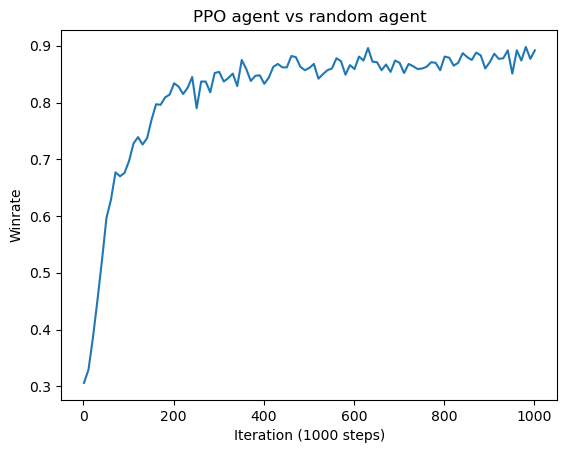

In [67]:
plt.plot(df_res["train_iter"], df_res["winrate"])
plt.title("PPO agent vs random agent")
plt.ylabel("Winrate")
plt.xlabel("Iteration (1000 steps)")

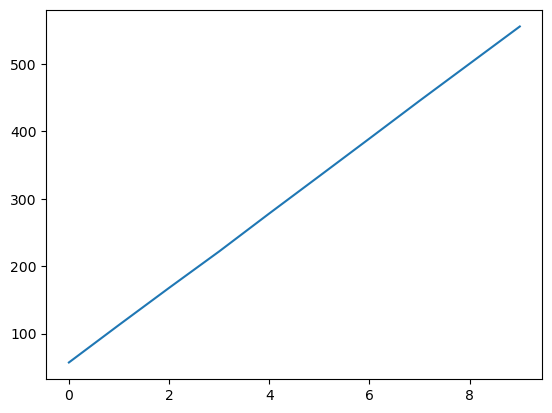

In [11]:
with open("../results/dqn_kerasrl/train_stats.json", "r") as f:
    obj = json.load(f)

df_keras = pd.DataFrame(obj)
df_keras
plt.plot(df_keras["wall_time"])

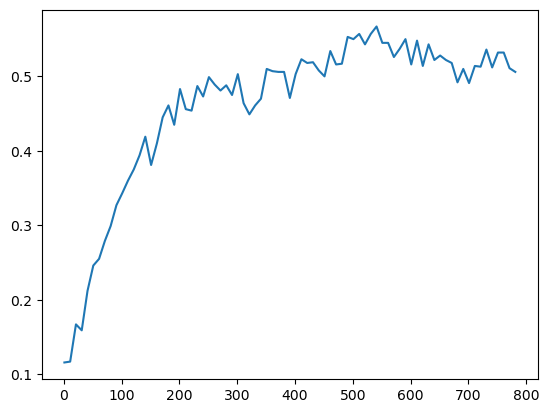

In [13]:
plt.plot(df_res["train_iter"], df_res["winrate"])